**importing libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from pylab import rcParams
import scipy
from scipy.stats import pearsonr
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from IPython.display import clear_output
from sklearn.metrics import silhouette_score, silhouette_samples

**setting up visualization parameters**

In [2]:
%matplotlib inline
rcParams['figure.figsize'] = 8,4

**loading reference dataframe**

In [3]:
file_name_reference = '/content/drive/MyDrive/multivariate_statistics_data/csv_reference_base.csv'

In [4]:
reference_df = pd.read_csv(file_name_reference, index_col='GEM_NAME')
print(reference_df)
print("Missing values " + str(reference_df.isnull().sum().sum()))
reference_df.describe()

                       rural_type
GEM_NAME                         
Bocksdorf                     430
Burgauberg-Neudauberg         430
Eberau                        430
Gerersdorf-Sulz               430
Güssing                       430
...                           ...
Mittelberg                    430
Schnepfau                     430
Schoppernau                   430
Schröcken                     430
Warth                         430

[398 rows x 1 columns]
Missing values 0


,rural_type
count,398.000000
mean,420.452261
std,29.424308
min,330.000000
25%,430.000000
50%,430.000000
75%,430.000000
max,430.000000


**loading input dataframe**

In [5]:
file_name_input = '/content/drive/MyDrive/multivariate_statistics_data/csv_input_solid.csv'

In [6]:
df = pd.read_csv(file_name_input, index_col='GEM_NAME')
print(df)
print("Missing values " + str(df.isnull().sum().sum()))
df.describe()

                       p_employ_sec_III_19  p_comm_out_19  p_foreign_19
GEM_NAME                                                               
Bocksdorf                            45.28           85.9          2.37
Burgauberg-Neudauberg                54.55           81.1          4.85
Eberau                               66.67           72.7         11.89
Gerersdorf-Sulz                      63.93           82.5          5.51
Güssing                              77.45           50.7          9.90
...                                    ...            ...           ...
Mittelberg                           82.23           12.4         46.98
Schnepfau                            32.59           70.8         13.94
Schoppernau                          67.47           57.8          9.63
Schröcken                            85.71           56.9         15.64
Warth                                90.67           26.1          6.10

[398 rows x 3 columns]
Missing values 0


,p_employ_sec_III_19,p_comm_out_19,p_foreign_19
count,398.000000,398.000000,398.000000
mean,58.099849,67.047487,6.867990
std,17.104942,14.048994,5.914621
min,0.000000,12.400000,0.120000
25%,46.675000,60.400000,3.042500
50%,57.720000,70.000000,5.470000
75%,70.170000,76.400000,8.977500
max,96.470000,96.200000,64.630000


**check for validity of Pearson Correlation Coefficient**

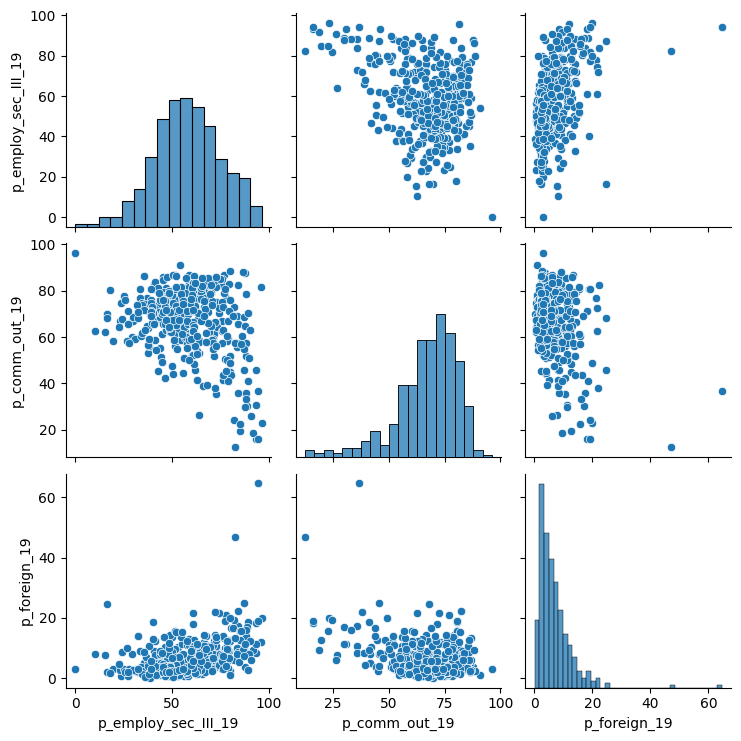

In [7]:
sb.pairplot(df)

**calculating Pearson Correlation Coefficient**

In [8]:
corr = df.corr()
corr

,p_employ_sec_III_19,p_comm_out_19,p_foreign_19
p_employ_sec_III_19,1.000000,-0.316096,0.425375
p_comm_out_19,-0.316096,1.000000,-0.358130
p_foreign_19,0.425375,-0.358130,1.000000


**function definitions**

In [9]:
# function for calculating the optimum number of clusters
def optimise_kmeans(data, max_k):
    means = []
    intertias = []

    for k in range(1, max_k + 1):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(data)

        means.append(k)
        intertias.append(kmeans.inertia_)

    fig = plt.subplots(figsize=(10, 5))
    plt.plot(means, intertias, 'o-')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.grid(True)
    plt.show

In [10]:
# function for initializing the first random centroids
def random_centroids(data, k):
    centroids = []
    for i in range(k):
        centroid = data.apply(lambda x: float(x.sample()))
        centroids.append(centroid)
    return pd.concat(centroids, axis=1)

In [11]:
# function for getting the cluster label for each data point in each iteration (using Manhattan Distance)
# --> clusters may appear more diamond shape or along an axis
def get_labels_manha(data, centroids):
    distances = centroids.apply(lambda x: np.abs(data - x).sum(axis=1))
    return distances.idxmin(axis=1)

In [12]:
# function for getting the cluster label for each data point in each iteration (using Euclidian Distance)
# --> clusters may appear more circular
def get_labels_eucl(data, centroids):
    distances = centroids.apply(lambda x: np.sqrt(((data - x) ** 2).sum(axis=1)))
    return distances.idxmin(axis=1)

In [13]:
# function for calculating new centroids in every iteration based on a modified geometric mean
def new_centroids(data, labels, k):
    return cluster_data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T

In [14]:
# function for plotting clusters
def plot_clusters(data, labels, centroids, iteration):
    pca = PCA(n_components=2)
    data_2d = pca.fit_transform(data)
    centroids_2d = pca.transform(centroids.T)
    clear_output(wait=True)
    plt.title(f'Iteration {iteration}')
    plt.scatter(x=data_2d[:,0], y=data_2d[:,1], c=labels)
    plt.scatter(x=centroids_2d[:,0], y=centroids_2d[:,1])
    plt.show()

**defining the data that we want to use in our analysis**

In [15]:
cluster_data = df.copy()
cluster_data

,p_employ_sec_III_19,p_comm_out_19,p_foreign_19
GEM_NAME,,,
Bocksdorf,45.28,85.9,2.37
Burgauberg-Neudauberg,54.55,81.1,4.85
Eberau,66.67,72.7,11.89
Gerersdorf-Sulz,63.93,82.5,5.51
Güssing,77.45,50.7,9.90
...,...,...,...
Mittelberg,82.23,12.4,46.98
Schnepfau,32.59,70.8,13.94
Schoppernau,67.47,57.8,9.63


**Min/Max Scaling to scale our data in range 1 to 10**

In [16]:
cluster_data = ((cluster_data - cluster_data.min()) / (cluster_data.max() - cluster_data.min())) * 9 + 1
cluster_data.describe()

,p_employ_sec_III_19,p_comm_out_19,p_foreign_19
count,398.000000,398.000000,398.000000
mean,6.420324,6.869062,1.941434
std,1.595776,1.508842,0.825168
min,1.000000,1.000000,1.000000
25%,5.354463,6.155131,1.407727
50%,6.384886,7.186158,1.746396
75%,7.546387,7.873508,2.235739
max,10.000000,10.000000,10.000000


**identifiying optimum number of clusters**

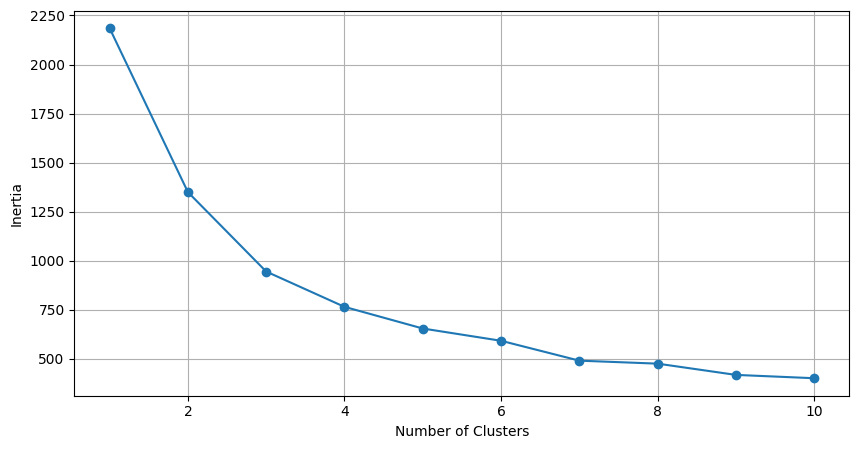

In [17]:
optimise_kmeans(cluster_data, 10)

**performing analysis with euclidian distance OR manhattan distance**

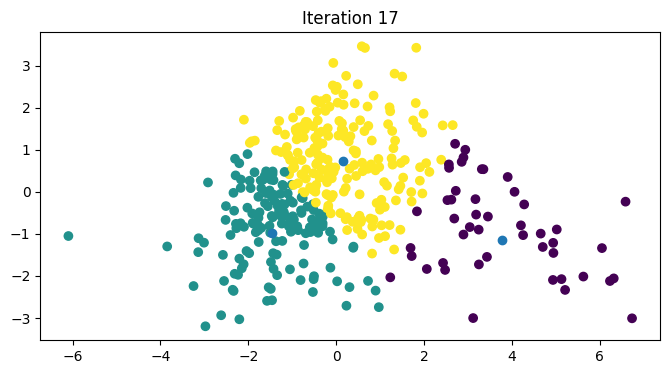

In [18]:
t_max_iterations = 100
t_k = 3

t_centroids = random_centroids(cluster_data, t_k)
t_old_centroids = pd.DataFrame()
t_iteration = 1
t_labels = pd.Series(dtype='int64')

while t_iteration < t_max_iterations and not t_centroids.equals(t_old_centroids):
    t_old_centroids = t_centroids
    t_labels = get_labels_eucl(cluster_data, t_centroids) # switch distance methods here
    t_centroids = new_centroids(cluster_data, t_labels, t_k)
    plot_clusters(cluster_data, t_labels, t_centroids, t_iteration)
    t_iteration += 1

**centroids after execution**

In [19]:
t_centroids

,0,1,2
p_employ_sec_III_19,8.544918,4.708515,7.041467
p_comm_out_19,3.626467,7.019487,7.320335
p_foreign_19,2.728325,1.564879,1.858999


**assigned labels after execution**

In [20]:
t_labels

,0
GEM_NAME,
Bocksdorf,1
Burgauberg-Neudauberg,2
Eberau,2
Gerersdorf-Sulz,2
Güssing,0
...,...
Mittelberg,0
Schnepfau,1
Schoppernau,2


**interpreting results**

In [21]:
reference_df['labels'] = t_labels

In [22]:
reference_df

,rural_type,labels
GEM_NAME,,
Bocksdorf,430,1
Burgauberg-Neudauberg,430,2
Eberau,430,2
Gerersdorf-Sulz,430,2
Güssing,430,0
...,...,...
Mittelberg,430,0
Schnepfau,430,1
Schoppernau,430,2


**result counts**

In [23]:
result_counts = reference_df.groupby(['labels', 'rural_type']).size().unstack(fill_value=0)
print(result_counts)

rural_type  330  430
labels              
0             0   47
1             8  141
2            30  172


**result percentages**

In [24]:
result_distribution = pd.crosstab(reference_df['labels'], reference_df['rural_type'], normalize='index')
print(result_distribution)

rural_type       330       430
labels                        
0           0.000000  1.000000
1           0.053691  0.946309
2           0.148515  0.851485


**visualizing cluster distributions**

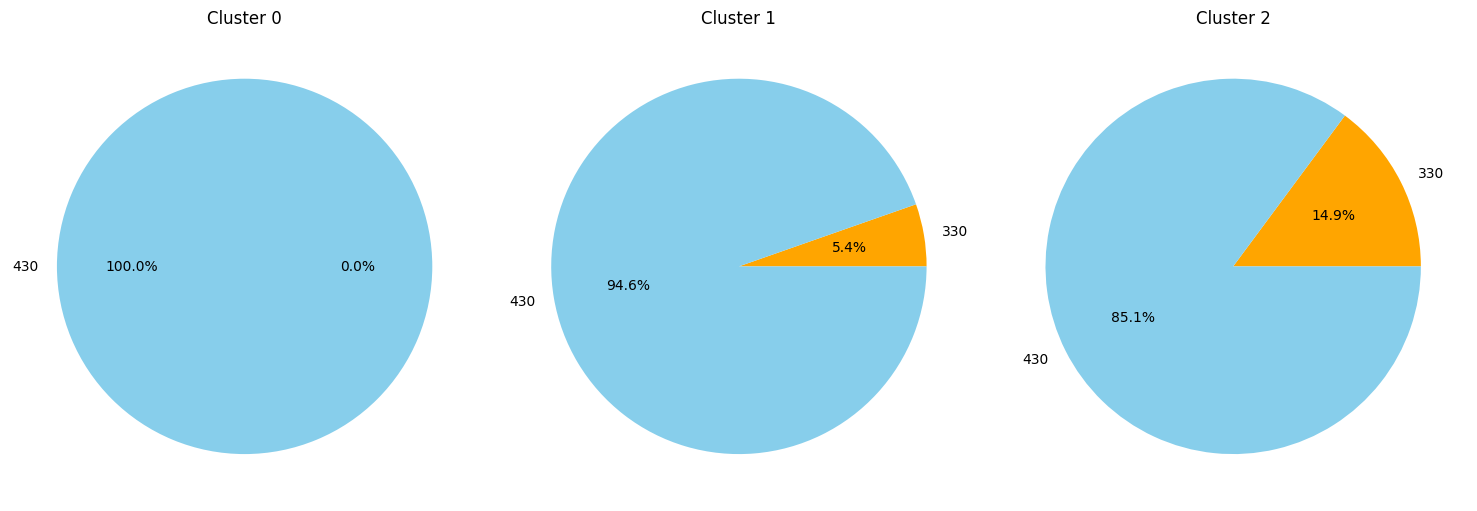

In [25]:
fig, axes = plt.subplots(1, len(result_distribution), figsize=(15, 5))

colors = {330: 'orange', 430: 'skyblue'}

for ax, (cluster, row) in zip(axes, result_distribution.iterrows()):
    row.plot(kind='pie', ax=ax, colors=[colors[val] for val in row.index], autopct='%1.1f%%')
    ax.set_title(f'Cluster {cluster}')
    ax.set_ylabel('')

plt.tight_layout()
plt.show()


**Calculating Silhouette Score**

In [26]:
silhouette_avg = silhouette_score(cluster_data, t_labels)
print(f"The average silhouette score is {silhouette_avg}")

The average silhouette score is 0.3203182468505592


**Visualization of Silhouette Score**

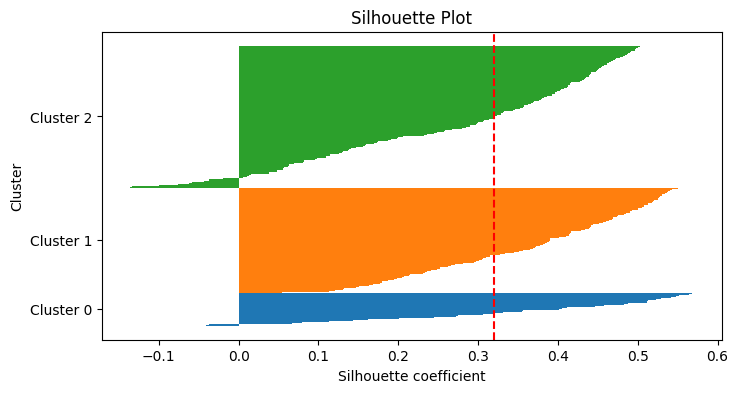

In [27]:
# Calculate silhouette values
silhouette_vals = silhouette_samples(cluster_data, t_labels)

# Number of clusters
n_clusters = len(np.unique(t_labels))

# Silhouette plot
y_lower, y_upper = 0, 0
yticks = []

for i in range(n_clusters):
    cluster_silhouette_vals = silhouette_vals[t_labels == i]
    cluster_silhouette_vals.sort()
    y_upper += len(cluster_silhouette_vals)
    plt.barh(range(y_lower, y_upper), cluster_silhouette_vals, height=1.0, edgecolor='none')
    yticks.append((y_lower + y_upper) / 2)
    y_lower += len(cluster_silhouette_vals)

plt.axvline(np.mean(silhouette_vals), color='red', linestyle='--')
plt.yticks(yticks, [f'Cluster {i}' for i in range(n_clusters)])
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.title('Silhouette Plot')
plt.show()